In [1]:
import sys
import os
path_to_top_dir = "../"
# Dynamically add the `project` directory to the path
sys.path.append(os.path.abspath(path_to_top_dir))

In [2]:
from pom_models.functions import fragance_propabilities_from_smiles
import pandas as pd
import numpy as np
import json
from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib import pyplot as plt
from pycirclize import Circos


Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'
c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module impli

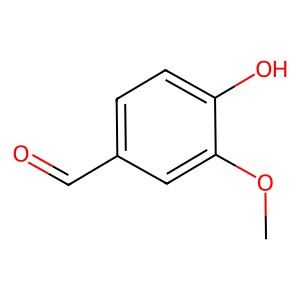

In [3]:
# Vanillin
vanillin_smiles = "COc1cc(C=O)ccc1O"
vanillin_mol = Chem.MolFromSmiles(vanillin_smiles)
Draw.MolToImage(vanillin_mol)

In [4]:
openpom_df = pd.read_csv("../data/data.csv")
openpom_df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [5]:
vanilla_df = openpom_df.loc[openpom_df['nonStereoSMILES'] == vanillin_smiles][openpom_df.keys()[2:]].reset_index(drop=True)
vanilla_df

,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,aromatic,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
vanilla_df

,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,aromatic,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
vanilla_target = fragance_propabilities_from_smiles(vanillin_smiles)[0]
vanilla_df.loc[1] = vanilla_target
vanilla_df

,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,aromatic,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.045757,0.042829,0.053417,0.286403,0.032922,0.202889,0.361723,0.02111,0.042374,0.317042,...,0.099636,0.660836,0.048917,0.069986,0.024058,0.236474,0.061076,0.024554,0.118745,0.438465


<Axes: >

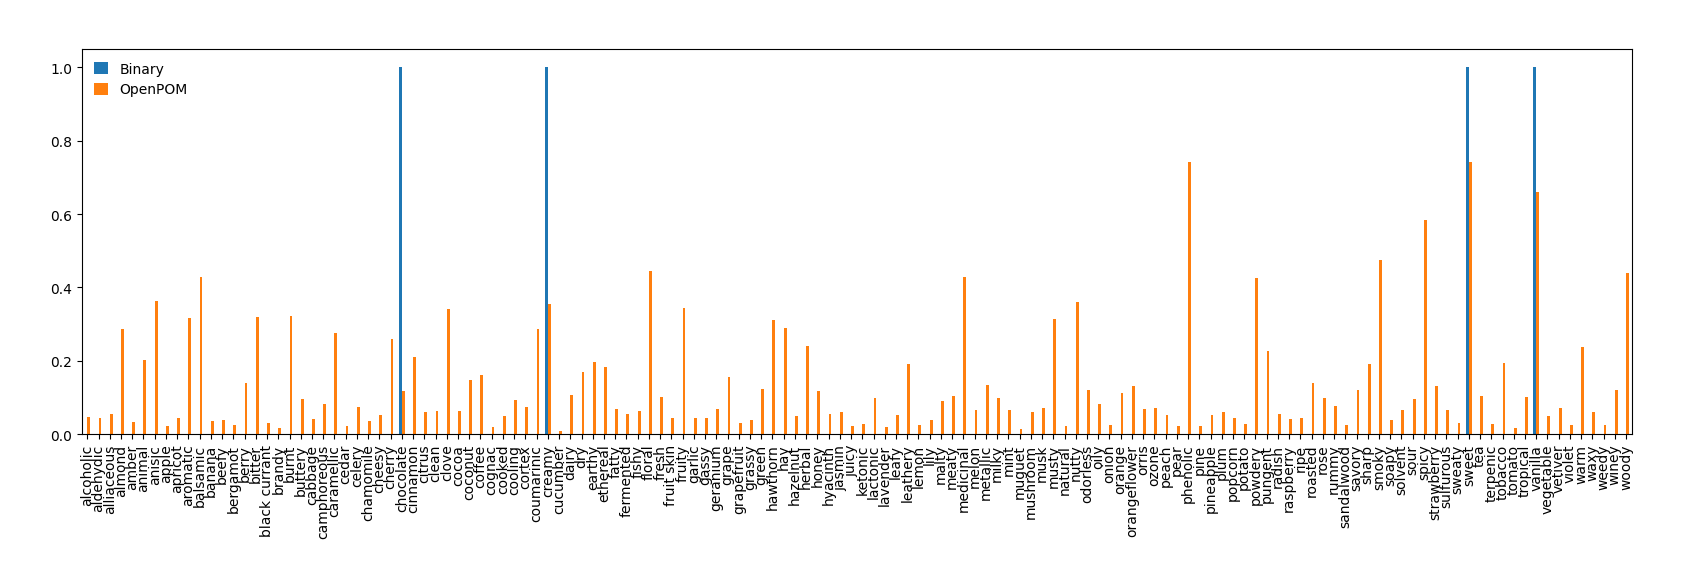

In [8]:
df_transposed = vanilla_df.T
df_transposed = df_transposed.rename(columns={0: 'Binary', 1: 'OpenPOM'})

# Plot the transposed DataFrame
df_transposed.plot(kind='bar', figsize=(20, 5))

In [9]:
df_transposed

,Binary,OpenPOM
alcoholic,0.0,0.045757
aldehydic,0.0,0.042829
alliaceous,0.0,0.053417
almond,0.0,0.286403
amber,0.0,0.032922
...,...,...
warm,0.0,0.236474
waxy,0.0,0.061076
weedy,0.0,0.024554
winey,0.0,0.118745


In [10]:
df_sorted = df_transposed.sort_values(by='OpenPOM', ascending=False)
df_sorted['Binary'] = df_sorted['Binary'].astype(int)
df_sorted = df_sorted[['OpenPOM', 'Binary']]
df_sorted.head()

,OpenPOM,Binary
phenolic,0.742883,0
sweet,0.740703,1
vanilla,0.660836,1
spicy,0.584315,0
smoky,0.475027,0


In [11]:
vanilla_latex_tab = df_sorted.to_latex(
    caption="OpenPOM and binary target values for vanillin.",
    label="tab:vanillintargetcalc",
    float_format="%.2f",
)
print(vanilla_latex_tab)

\begin{table}
\caption{OpenPOM and binary target values for vanillin.}
\label{tab:vanillintargetcalc}
\begin{tabular}{lrr}
\toprule
 & OpenPOM & Binary \\
\midrule
phenolic & 0.74 & 0 \\
sweet & 0.74 & 1 \\
vanilla & 0.66 & 1 \\
spicy & 0.58 & 0 \\
smoky & 0.48 & 0 \\
floral & 0.44 & 0 \\
woody & 0.44 & 0 \\
medicinal & 0.43 & 0 \\
balsamic & 0.43 & 0 \\
powdery & 0.43 & 0 \\
anisic & 0.36 & 0 \\
nutty & 0.36 & 0 \\
creamy & 0.35 & 1 \\
fruity & 0.34 & 0 \\
clove & 0.34 & 0 \\
burnt & 0.32 & 0 \\
bitter & 0.32 & 0 \\
aromatic & 0.32 & 0 \\
musty & 0.31 & 0 \\
hawthorn & 0.31 & 0 \\
hay & 0.29 & 0 \\
coumarinic & 0.29 & 0 \\
almond & 0.29 & 0 \\
caramellic & 0.27 & 0 \\
cherry & 0.26 & 0 \\
herbal & 0.24 & 0 \\
warm & 0.24 & 0 \\
pungent & 0.23 & 0 \\
cinnamon & 0.21 & 0 \\
animal & 0.20 & 0 \\
earthy & 0.20 & 0 \\
tobacco & 0.19 & 0 \\
leathery & 0.19 & 0 \\
sharp & 0.19 & 0 \\
ethereal & 0.18 & 0 \\
dry & 0.17 & 0 \\
coffee & 0.16 & 0 \\
grape & 0.16 & 0 \\
coconut & 0.15 & 0 \\
roast

In [12]:
df_ = df_sorted.head(8)["OpenPOM"].to_frame().T
upper_df = df_.set_index([["Vanillin"]])


In [13]:
df_ = df_sorted.tail(8)["OpenPOM"].to_frame().T
lower_df = df_.set_index([["Vanillin"]])

In [14]:
lower_df

,apple,pine,lavender,cognac,tomato,brandy,muguet,cucumber
Vanillin,0.02111,0.020754,0.01833,0.017844,0.017648,0.01614,0.014362,0.008359


In [15]:
vanilla_dfs = [upper_df,lower_df]

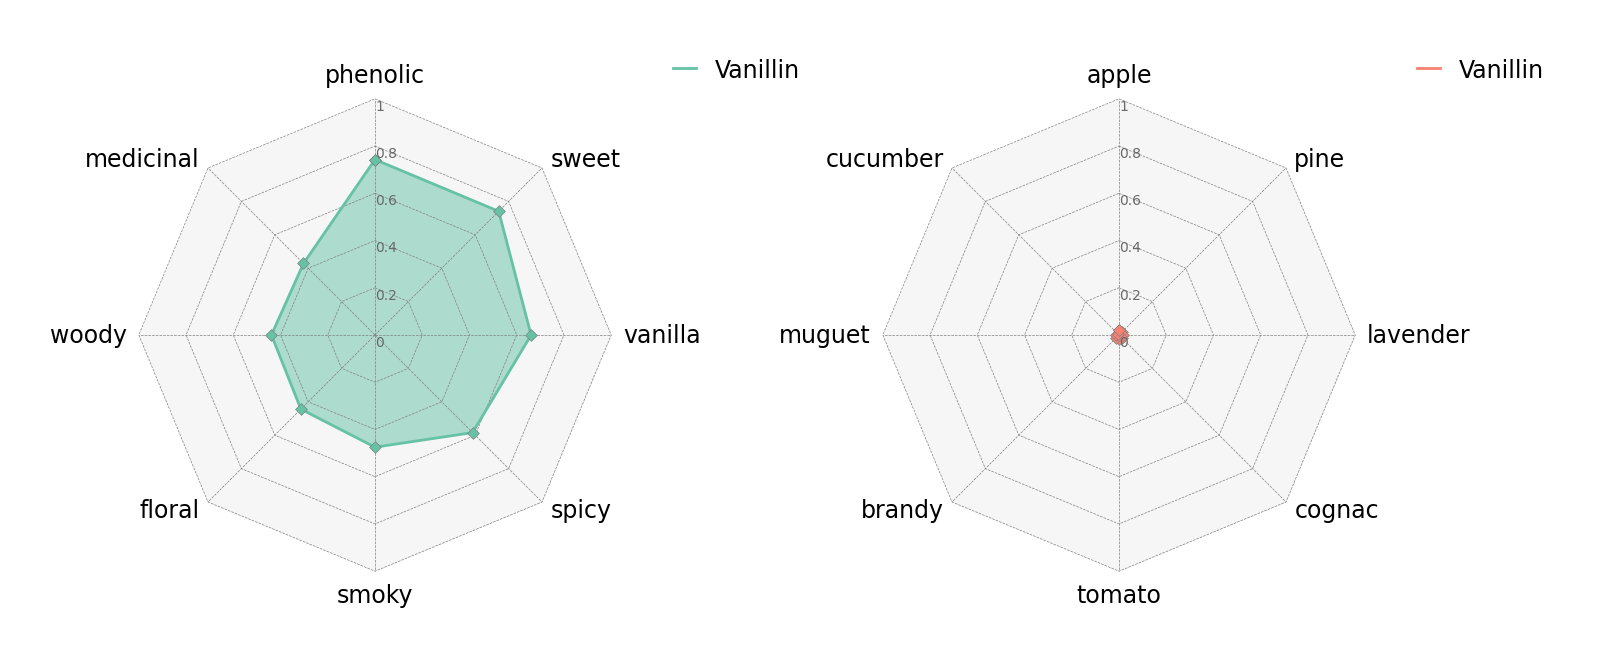

In [16]:
# Create 5 x 5 subplots
fig = plt.figure(figsize=(16, 8), dpi=100)
fig.subplots(1, 2, subplot_kw=dict(polar=True))
fig.subplots_adjust(wspace=0.5, hspace=0.25)
colors = [ "green","salmon","skyblue","salmon","lime","magenta"]
# Plot radar chart into subplots for each target
for i,  ax in enumerate(fig.axes):
    target_df = vanilla_dfs[i]
    # Initialize Circos instance for radar chart plot
    if i == 0:
        circos = Circos.radar_chart(
            target_df,
            vmax=1,
            marker_size=6,
            grid_interval_ratio=0.2,
            line_kws_handler=lambda _: dict(lw=2, ls="solid"),
            marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
            label_kws_handler=lambda _: dict(size=17),
        )
    else:
        circos = Circos.radar_chart(
            target_df,
            vmax=1,
            marker_size=6,
            cmap={"Vanillin": colors[i]},
            grid_interval_ratio=0.2,
            line_kws_handler=lambda _: dict(lw=2, ls="solid"),
            marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
            label_kws_handler=lambda _: dict(size=17),
        )

    # Plot figure & set legend on upper right
    circos.plotfig(ax=ax)
    circos.ax.legend(loc="upper right", fontsize=17,bbox_to_anchor=(1.4, 1.1))
    fig.savefig("../images/vanillin_target.pdf")

[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]



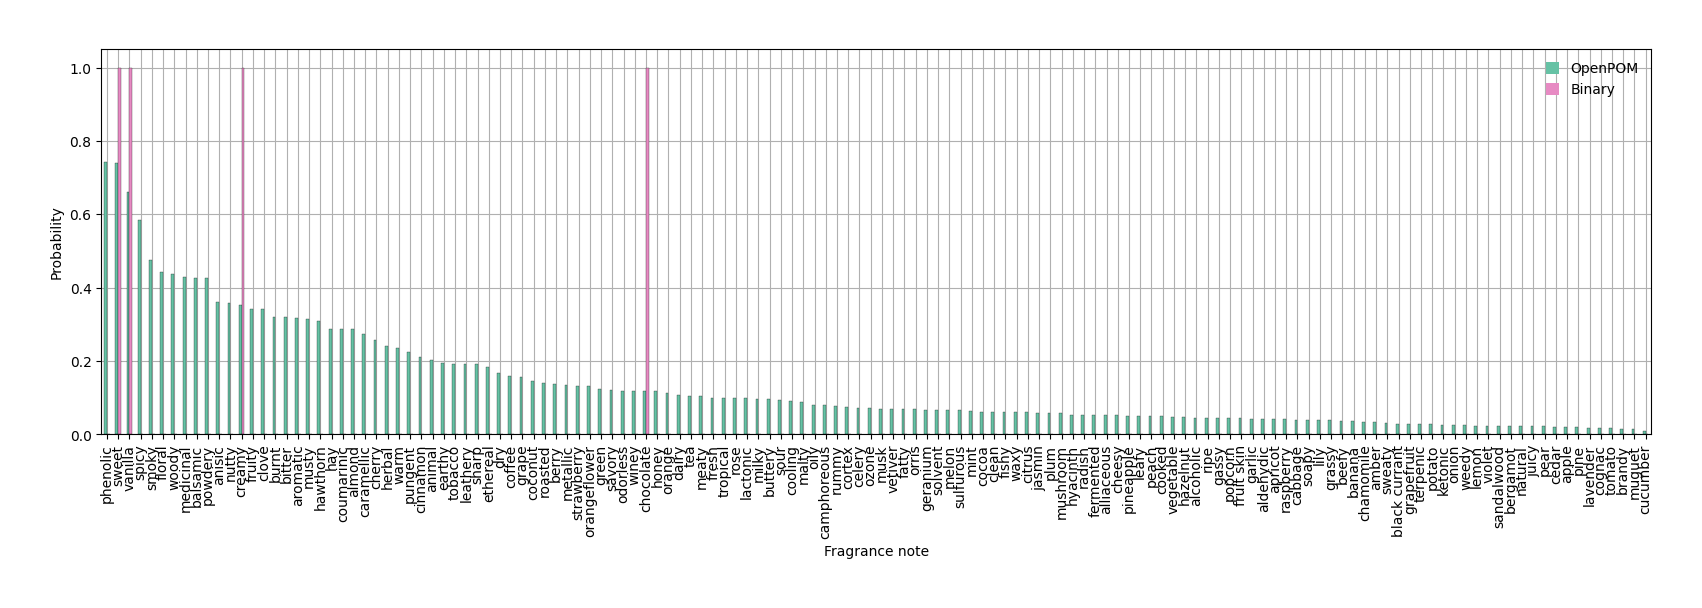

In [17]:
import seaborn as sns
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("Set2"))
print(cmap.colors)
print()
ax = df_sorted.plot(
    kind="bar",
    figsize=(20,5),
    fontsize=10,
    legend=True,
    #colormap=cmap,
    color=[cmap.colors[0],cmap.colors[3]],
    zorder=2,
    )
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.2)
plt.grid(zorder=1)
fsize=10
plt.xlabel(r"Fragrance note", fontsize=fsize)
plt.ylabel("Probability", fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig("../images/vanilla_target_bars_sorted.pdf", bbox_inches="tight")

In [18]:
import json

In [27]:
with open("../data/pine_target_2.json", "r") as file:
    data = json.load(file)
data

[0.06015679738840933,
 0.2096520848804386,
 0.08337212983168577,
 0.08833910965233836,
 0.33611651818681026,
 0.2683353735141846,
 0.18713417120227516,
 0.14195575260378707,
 0.14449604032223276,
 0.20086818243282617,
 0.2132034207126755,
 0.07270558673900183,
 0.08896248758001175,
 0.13861516825684683,
 0.23600614840486922,
 0.13562119613872434,
 0.15948043746026003,
 0.06946793856840223,
 0.1308044386701302,
 0.06632552447455668,
 0.08598226886908046,
 0.5034001017320543,
 0.09890932734264743,
 0.2949652432498446,
 0.18833663737922687,
 0.06883266367025447,
 0.10587180789255148,
 0.07161808864561585,
 0.1121648297552572,
 0.10791982549812146,
 0.3205061446731162,
 0.3016804498095253,
 0.08729671677365931,
 0.13039261903120677,
 0.0757116518943597,
 0.09356458180606332,
 0.032943046050063526,
 0.12056190994915207,
 0.34796384320511364,
 0.1525630652238192,
 0.1136068681045508,
 0.11699377660423649,
 0.0567811280777513,
 0.07754659676447415,
 0.2593262748697287,
 0.49506284950736307,
 

In [28]:
np.array(data).T


array([0.0601568 , 0.20965208, 0.08337213, 0.08833911, 0.33611652,
       0.26833537, 0.18713417, 0.14195575, 0.14449604, 0.20086818,
       0.21320342, 0.07270559, 0.08896249, 0.13861517, 0.23600615,
       0.1356212 , 0.15948044, 0.06946794, 0.13080444, 0.06632552,
       0.08598227, 0.5034001 , 0.09890933, 0.29496524, 0.18833664,
       0.06883266, 0.10587181, 0.07161809, 0.11216483, 0.10791983,
       0.32050614, 0.30168045, 0.08729672, 0.13039262, 0.07571165,
       0.09356458, 0.03294305, 0.12056191, 0.34796384, 0.15256307,
       0.11360687, 0.11699378, 0.05678113, 0.0775466 , 0.25932627,
       0.49506285, 0.12872503, 0.14567208, 0.11206588, 0.13193542,
       0.45181148, 0.51065964, 0.1378915 , 0.51448998, 0.07162064,
       0.08922959, 0.17316205, 0.09602729, 0.29628355, 0.14727846,
       0.5195957 , 0.08910891, 0.15164074, 0.1004396 , 0.61586402,
       0.14209731, 0.14464864, 0.13529575, 0.08627947, 0.1574628 ,
       0.12147874, 0.18246039, 0.2584288 , 0.26032652, 0.23711

In [29]:
pine_df = pd.DataFrame(
    columns=["OpenPOM"],
)

In [30]:
pine_df["OpenPOM"]=data
pine_df

,OpenPOM
0,0.060157
1,0.209652
2,0.083372
3,0.088339
4,0.336117
...,...
133,0.188657
134,0.149626
135,0.152026
136,0.074805


In [31]:
pine_df =pine_df.set_index(df_transposed.index)

[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]



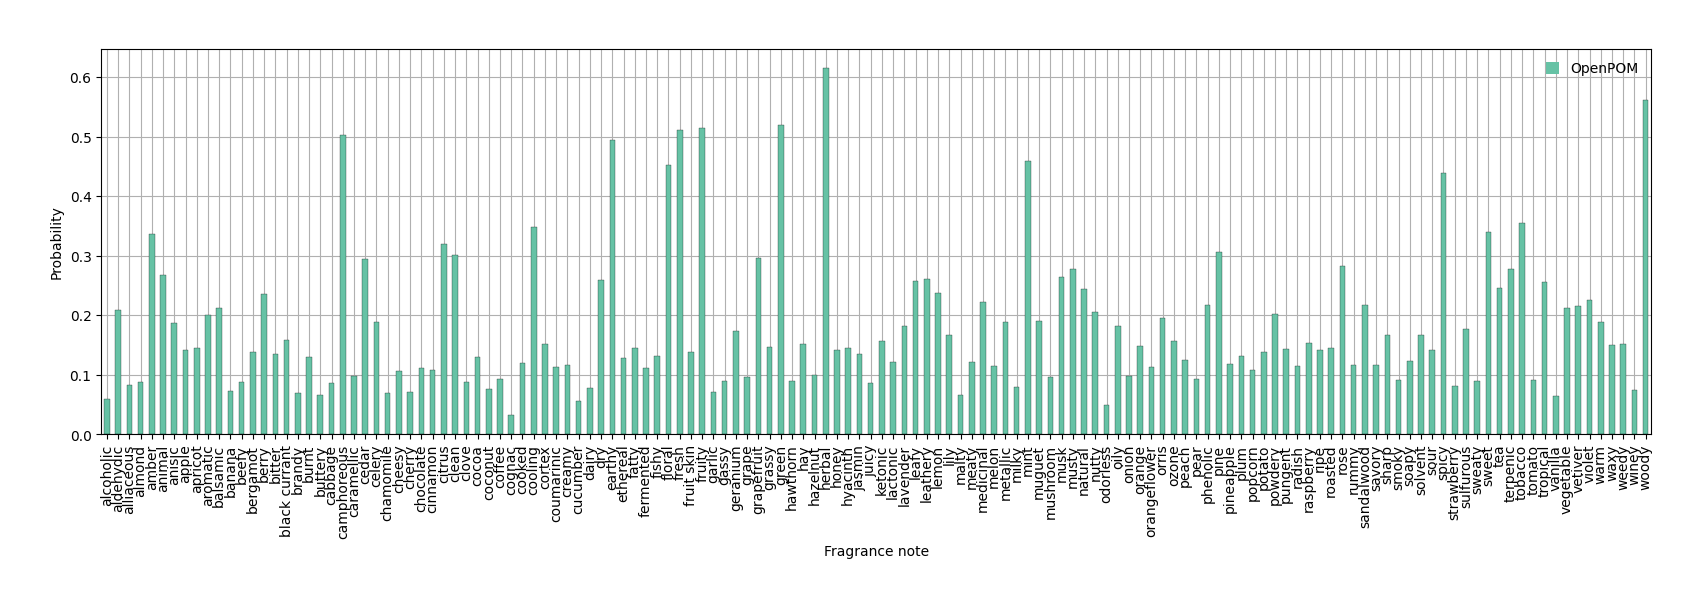

In [32]:
import seaborn as sns
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("Set2"))
print(cmap.colors)
print()
ax = pine_df.plot(
    kind="bar",
    figsize=(20,5),
    fontsize=10,
    legend=True,
    #colormap=cmap,
    color=[cmap.colors[0],cmap.colors[0]],
    zorder=2,
    )
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.2)
plt.grid(zorder=1)
fsize=10
plt.xlabel(r"Fragrance note", fontsize=fsize)
plt.ylabel("Probability", fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig("../images/pine_target_bars.pdf", bbox_inches="tight")

In [38]:
print(pine_df.sort_values("OpenPOM", ascending=False).to_latex(
    float_format="%.4f"
))

\begin{tabular}{lr}
\toprule
 & OpenPOM \\
\midrule
herbal & 0.6159 \\
woody & 0.5614 \\
green & 0.5196 \\
fruity & 0.5145 \\
fresh & 0.5107 \\
camphoreous & 0.5034 \\
earthy & 0.4951 \\
mint & 0.4601 \\
floral & 0.4518 \\
spicy & 0.4393 \\
tobacco & 0.3550 \\
cooling & 0.3480 \\
sweet & 0.3401 \\
amber & 0.3361 \\
citrus & 0.3205 \\
pine & 0.3061 \\
clean & 0.3017 \\
grapefruit & 0.2963 \\
cedar & 0.2950 \\
rose & 0.2833 \\
terpenic & 0.2780 \\
musty & 0.2772 \\
animal & 0.2683 \\
musk & 0.2651 \\
leathery & 0.2603 \\
dry & 0.2593 \\
leafy & 0.2584 \\
tropical & 0.2564 \\
tea & 0.2463 \\
natural & 0.2440 \\
lemon & 0.2371 \\
berry & 0.2360 \\
violet & 0.2251 \\
medicinal & 0.2228 \\
sandalwood & 0.2175 \\
phenolic & 0.2170 \\
vetiver & 0.2160 \\
balsamic & 0.2132 \\
vegetable & 0.2117 \\
aldehydic & 0.2097 \\
nutty & 0.2063 \\
powdery & 0.2028 \\
aromatic & 0.2009 \\
orris & 0.1948 \\
muguet & 0.1902 \\
metallic & 0.1895 \\
warm & 0.1887 \\
celery & 0.1883 \\
anisic & 0.1871 \\
lavend

In [25]:
from rdkit.DataStructs import TanimotoSimilarity
from rdkit import Chem


In [26]:
mol1 = Chem.MolFromSmiles("CCCCCCCCCCCCCC")
mol2=Chem.MolFromSmiles("O")
TanimotoSimilarity(Chem.RDKFingerprint(mol1),Chem.RDKFingerprint(mol2))

0.0